<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza D.
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Patricio Pérez
- Nombre de alumno 2: Cristobal Pérez


### **Link de repositorio de GitHub:** `http://....`

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(4)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


## 2. Clasificación de pacientes con diabetes (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo una buena elección de las features?.

In [ ]:
#!pip install xgboost

In [3]:
# Libreria Core del lab.
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Pre-procesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder

#importar ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

# Modelos
from xgboost import XGBClassifier



In [ ]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# contar los valores nulos
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [ ]:
# ver valores unicos de cada columna
for col in df.columns:
    print(col, df[col].unique(), '\n')

Age [ 4. 12. 13. 11.  8.  1.  6.  3.  7. 10.  9.  5.  2.] 

Sex [1. 0.] 

HighChol [0. 1.] 

CholCheck [1. 0.] 

BMI [26. 28. 29. 18. 31. 32. 27. 24. 21. 58. 30. 20. 22. 38. 40. 25. 36. 47.
 19. 37. 41. 23. 34. 35. 42. 17. 33. 44. 15. 52. 69. 56. 45. 39. 92. 53.
 98. 50. 46. 79. 48. 16. 63. 72. 54. 49. 68. 43. 84. 73. 76. 55. 51. 75.
 57. 60. 12. 77. 82. 67. 71. 61. 14. 81. 59. 86. 13. 87. 65. 95. 89. 62.
 64. 66. 85. 70. 83. 80. 78. 74.] 

Smoker [0. 1.] 

HeartDiseaseorAttack [0. 1.] 

PhysActivity [1. 0.] 

Fruits [0. 1.] 

Veggies [1. 0.] 

HvyAlcoholConsump [0. 1.] 

GenHlth [3. 1. 2. 4. 5.] 

MentHlth [ 5.  0.  7.  3.  4.  2. 30. 20.  1. 15. 10. 25. 14. 28.  6. 29. 26. 12.
 16. 22. 13.  8.  9. 21. 18. 17. 27. 24. 23. 11. 19.] 

PhysHlth [30.  0. 10.  3.  6.  4. 15.  1.  2. 14.  7. 25. 21. 20.  5.  8. 22. 23.
 29. 12. 18. 28. 26. 24. 27. 11. 13. 16. 17.  9. 19.] 

DiffWalk [0. 1.] 

Stroke [0. 1.] 

HighBP [1. 0.] 

Diabetes [0. 1.] 



In [4]:
# Definir Pipeline de pre-procesamiento
numeric = ['Sex','HighChol','CholCheck','Smoker','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','Age','BMI','MentHlth','PhysHlth']
categoric = ['DiffWalk','Stroke','HighBP']
ordinal = ['GenHlth']
not_used = [None]

ct = ColumnTransformer(
    [
        ('One Hot',OneHotEncoder(sparse=False, handle_unknown="ignore",drop='if_binary'),categoric),
        ('Ordinal',OrdinalEncoder(),ordinal),
        ('Scaler',MinMaxScaler(),numeric)
    ],
    remainder='passthrough'
)

XGBoost_clas = Pipeline(steps=[
                      ("preprocessing", ct),
                      ("model", XGBClassifier())
])

In [5]:
# Separar datos en train y test
X_train, X_test, y_train, y_test = train_test_split(df.drop('Diabetes',axis=1), df['Diabetes'], test_size=0.2, random_state=42)

In [6]:
# Entrenar modelo con pipeline
XGBoost_clas.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['DiffWalk', 'Stroke',
                                                   'HighBP']),
                                                 ('Ordinal', OrdinalEncoder(),
                                                  ['GenHlth']),
                                                 ('Scaler', MinMaxScaler(),
                                                  ['Sex', 'HighChol',
                                                   'CholCheck', 'Smoker',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'Fruits...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [7]:
# Evaluar el modelo con report y matriz de confusión

from sklearn.metrics import classification_report, confusion_matrix

y_pred = XGBoost_clas.predict(X_test)

print(classification_report(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

[[5011 2079]
 [1491 5558]]


Se transformaron las columnas según tipos de datos, es decir se eligió la transformación conveniente para cada tipo de dato (One hot categoricas, MinMaxScales numericas y Ordinal Scaler Ordinales). Se utilizó un pipeline para la transformación de los datos y para el entrenamiento del modelo. Se utilizó un ColumnTransformer para la transformación de los datos. Luego se entrenó y los resultados obtenidos fueron un modelo con precisión promedio del 75%, al igual que el recall  el f-1 score. Son numeros que se pueden mejorar. De la matriz de confusion se puede decir que en cada clase existe un buen porcentaje de falsos positivos o negativos, el modelo en este sentido no es muy bueno.


## 3. Importancia de las features con XGBoost (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

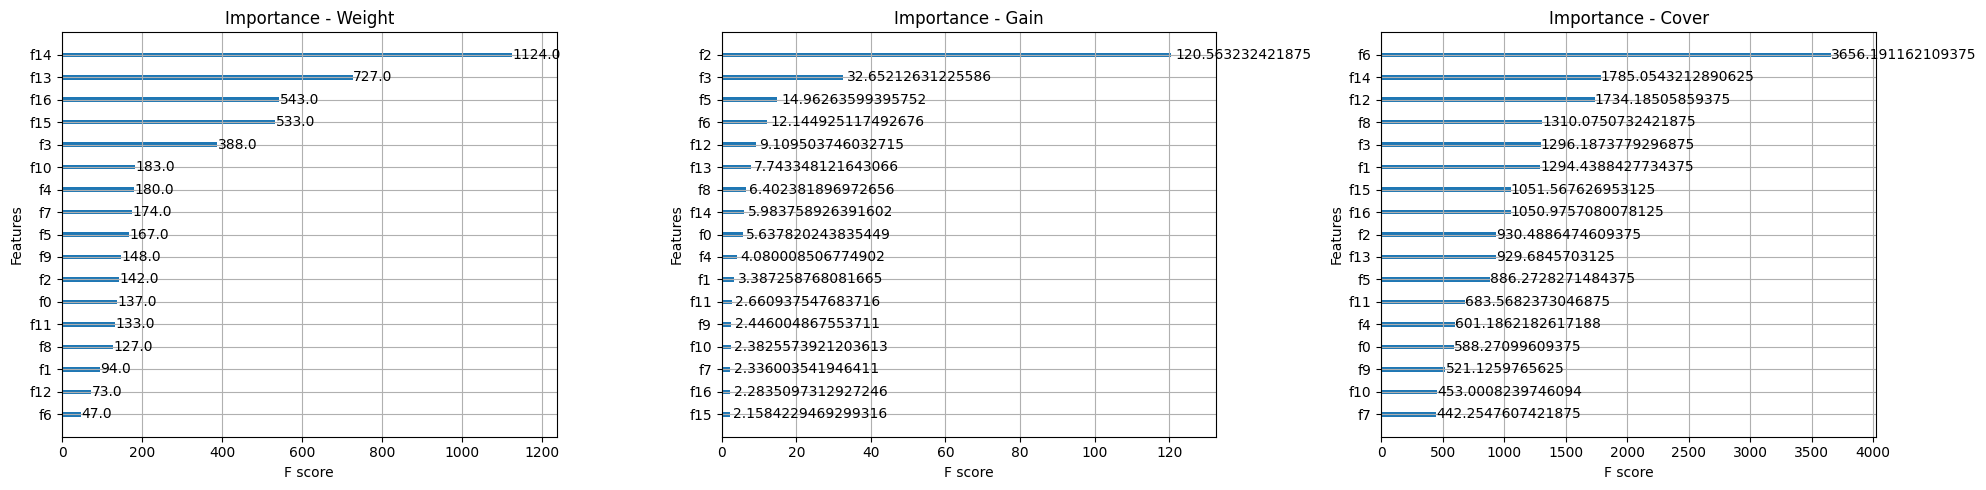

In [ ]:
# Calcular importancia de las features con plot_importance

from xgboost import plot_importance
import matplotlib.pyplot as plt

# Crear una figura con 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# Peso
plot_importance(XGBoost_clas['model'], importance_type='weight', title='Importance - Weight', show_values=True, ax=ax[0])

# Ganancia
plot_importance(XGBoost_clas['model'], importance_type='gain', title='Importance - Gain', show_values=True, ax=ax[1])

# Cobertura
plot_importance(XGBoost_clas['model'], importance_type='cover', title='Importance - Cover', show_values=True, ax=ax[2])

# Mostrar la figura
plt.tight_layout()
plt.show()



In [ ]:
# imprimir el nombre de cada feature con su numero
for i in range(len(X_train.columns)):
    print(i, X_train.columns[i])

0 Age
1 Sex
2 HighChol
3 CholCheck
4 BMI
5 Smoker
6 HeartDiseaseorAttack
7 PhysActivity
8 Fruits
9 Veggies
10 HvyAlcoholConsump
11 GenHlth
12 MentHlth
13 PhysHlth
14 DiffWalk
15 Stroke
16 HighBP


Según Weight la variable mas importante es la 14, según Gain la 2 y según Cover la 6.  DiffWalk, HighChol y HeartDiseaseorAttack. Según los resultados obtenidos, las variables mas importantes son las que tienen que ver con el historial médico de la persona, es decir, si ha tenido enfermedades del corazón, si tiene colesterol alto y si tiene dificultades para caminar. Esto es bastante lógico, ya que la diabetes es una enfermedad que afecta a todo el cuerpo y por lo tanto es probable que si una persona tiene diabetes, tenga otras enfermedades asociadas.

El significado de cada método
weight: Se refiere a la cantidad de veces que una característica aparece en un árbol a través de los árboles de ensamble.

gain: La ganancia media de la característica cuando se utiliza en árboles. Más específicamente, es la mejora promedio en la precisión que aporta una característica a los árboles en los que aparece.

cover: El promedio de cobertura de las observaciones de una característica donde cobertura se refiere al número de muestras afectadas por la división.

Por lo tanto, estos métodos pueden dar diferentes importancias dependiendo del objetivo. Por ejemplo, una característica podría ser utilizada frecuentemente en los árboles (alto weight), pero podría no aportar mucha mejora a las predicciones (bajo gain). O una característica podría ser utilizada menos frecuentemente, pero cuando lo es, afecta a un gran número de observaciones (alto cover). Por lo tanto, es posible ver diferencias en la importancia de las características dependiendo del método que se utilice, y es normal.

En general, para la importancia de tipo weight, gain y cover en un modelo de XGBoost, no hay un número específico que determine que una variable es "buena". Esto se debe a que estos valores dependen del número de veces que una característica se utiliza en el modelo (weight), del aumento promedio en la precisión de la predicción (gain) y de la cantidad de muestras que afecta la característica (cover).

En el caso de la importancia weight, una característica con un alto valor de peso simplemente significa que se ha utilizado más a menudo en los árboles del modelo.

En el caso de la importancia gain, una característica con un alto valor de ganancia significa que ha contribuido a aumentar significativamente la precisión del modelo.

Y finalmente, para la importancia cover, una característica con un alto valor de cobertura significa que ha afectado a un gran número de muestras.

Esto no necesariamente significa que estas características son "buenas" o "malas", simplemente que han tenido un impacto significativo en el modelo.

Hay debilidades en este método, como por ejemplo que las características con mayor número de categorías o valores únicos pueden tener una importancia inflada, o que la importancia de las características puede cambiar con diferentes conjuntos de entrenamiento, es decir, puede ser inestable, a pesar de estas limitaciones, la importancia de las características sigue siendo útil para una comprensión inicial de qué características son importantes para un modelo. Para una interpretación más completa, se pueden usar técnicas como SHAP Values.

## 4. Métodos Agnósticos Globales (1 pt)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

In [ ]:
from sklearn.inspection import permutation_importance

# Repeat permutation importance 30 times and store results
all_importances = []
for i in range(30):
    result = permutation_importance(XGBoost_clas, X_test, y_test, n_repeats=10, random_state=i)
    all_importances.append(result.importances)

# Convert to numpy array
all_importances = np.array(all_importances)


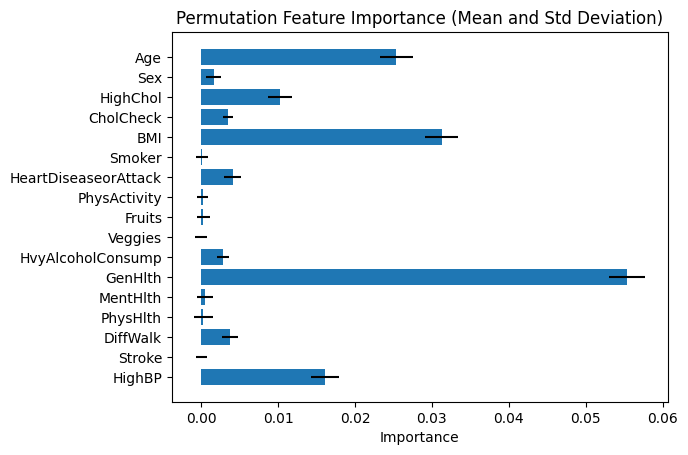

In [ ]:
# Compute the mean and standard deviation over the 30 runs for each feature
importances_mean = all_importances.mean(axis=(0, 2))
importances_std = all_importances.std(axis=(0, 2))

# Get feature names
feature_names = X_test.columns

# Initialize figure
fig, ax = plt.subplots()

# Create a bar plot for mean importances with standard deviation as error bars
y_pos = np.arange(len(feature_names))
ax.barh(y_pos, importances_mean, xerr=importances_std, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Importance')
ax.set_title('Permutation Feature Importance (Mean and Std Deviation)')

plt.show()


La desviación estandar en este caso muestra que la importancia de las variables no es estable, es decir, que puede cambiar dependiendo del conjunto de entrenamiento. Esto se debe a que el método de permutación es un método de aproximación, por lo que la importancia de las características puede cambiar ligeramente cada vez que se ejecuta el método.

La importancia de las características en la propuesta se mide utilizando la importancia de la permutación. El método de importancia de la permutación evalúa la importancia de una característica permutando aleatoriamente sus valores en el conjunto de datos y midiendo cuánto disminuye la precisión del modelo como resultado.

Las 5 features con el mayor impacto son Age, BMI, GenHlth, HighBP y HighChol. Estas variables tienen sentido, ya que la edad, el IMC, la presión arterial alta y el colesterol alto son factores de riesgo para la diabetes. Además, la salud general es una variable que puede estar relacionada con la diabetes, ya que las personas con diabetes pueden tener una salud general más baja.

En general, las características más importantes son las mismas, pero el orden de importancia es diferente. Esto se debe a que el método de permutación es un método de aproximación, por lo que la importancia de las características puede cambiar ligeramente cada vez que se ejecuta el método.
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

Ventajas:

Interpretabilidad: Este método es fácil de entender y explicar. Evalúa la importancia de las características midiendo el decremento en la precisión del modelo cuando los valores de una característica se permutan aleatoriamente.

Generalidad: Puede aplicarse a cualquier modelo supervisado. Esto contrasta con otros métodos de importancia de las características que sólo son aplicables a ciertos tipos de modelos.

Manejo de características irrelevantes y redundantes: Este método puede identificar características que no contribuyen a la precisión del modelo. Si permutar los valores de una característica no afecta a la precisión del modelo, entonces esa característica probablemente sea irrelevante.

Desventajas:

Costo computacional: La importancia de la permutación puede ser costosa computacionalmente, especialmente para los conjuntos de datos con un gran número de características, ya que requiere reajustar el modelo para cada característica.

Ruido aleatorio: Este método se basa en la permutación aleatoria de los valores de las características, lo que puede hacerlo sensible al ruido aleatorio. Aunque repetir el proceso varias veces y tomar el promedio puede ayudar a mitigar este problema, esto también aumenta el costo computacional.

Correlación entre características: Si dos características están altamente correlacionadas, permutar una característica no afectará mucho la precisión del modelo, ya que la otra característica proporciona información similar. Esto puede resultar en una subestimación de la importancia de estas características.

## 5. Métodos Agnósticos Locales (2 pt)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### Parte A (0.4 pt)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [ ]:
#!pip install shap

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
                                              0.0/380.1 kB ? eta -:--:--
     --------                                81.9/380.1 kB 1.5 MB/s eta 0:00:01
     -----------------                      174.1/380.1 kB 2.1 MB/s eta 0:00:01
     -------------------------              256.0/380.1 kB 1.7 MB/s eta 0:00:01
     -------------------------------        317.4/380.1 kB 1.8 MB/s eta 0:00:01
     -------------------------------------- 380.1/380.1 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for shap: filename=shap-0.41.0-cp311-cp311-win_amd64.whl size=433836 sha256=5a8c7ab522f43e2b682418647739cd39

In [ ]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [13]:
# Si no usaba esto no funcionaba el shap :(
import shap
import xgboost as xgb

clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)



In [ ]:
# Primero comenzamos eligiendo el explainer, este debe ser coherente con el problema
# que estamos resolviendo, para este caso como estamos usando boosting, usamos
# árboles
explainer = shap.TreeExplainer(clf)
shap_values = explainer(df.drop('Diabetes',axis=1))

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Los valores SHAP (SHapley Additive exPlanations) representan la contribución de cada característica a la predicción para una observación específica en comparación con la predicción promedio del modelo. Los valores SHAP son una medida de la importancia de una característica y son útiles para la interpretación del modelo.

Si un valor SHAP para una característica dada es positivo, esto indica que esa característica aumenta la predicción del modelo para esa observación en comparación con la predicción promedio. Por otro lado, si un valor SHAP es negativo, esto indica que la característica disminuye la predicción del modelo para esa observación.

Los valores absolutos de los valores SHAP indican la magnitud del impacto de cada característica en la predicción. Por lo tanto, las características con mayores valores absolutos de SHAP son las más importantes para la predicción del modelo.

Es importante tener en cuenta que los valores SHAP respetan la propiedad de aditividad de los juegos cooperativos, lo que significa que la suma de los valores SHAP para todas las características es igual a la diferencia entre la predicción del modelo para esa observación y la predicción promedio del modelo.

Además, a diferencia de otros métodos de importancia de características, los valores SHAP tienen en cuenta las interacciones entre las características, lo que puede proporcionar una visión más completa de la importancia de las características.

### Parte B (0.4 pt)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?
- ¿Existe algún patrón común entre las instancias analizadas?
- ¿Es posible generalizar estas conclusiones a todo el dataset?

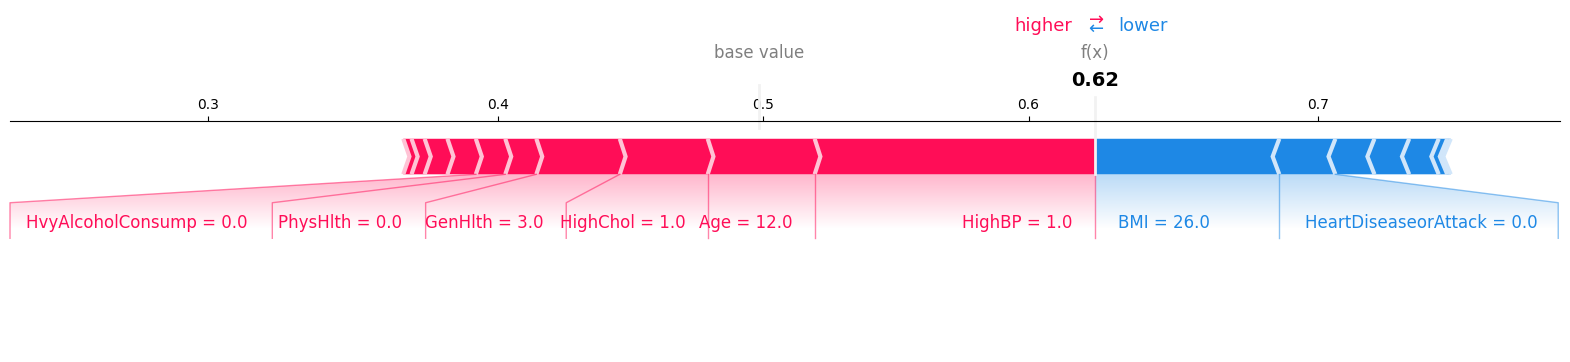

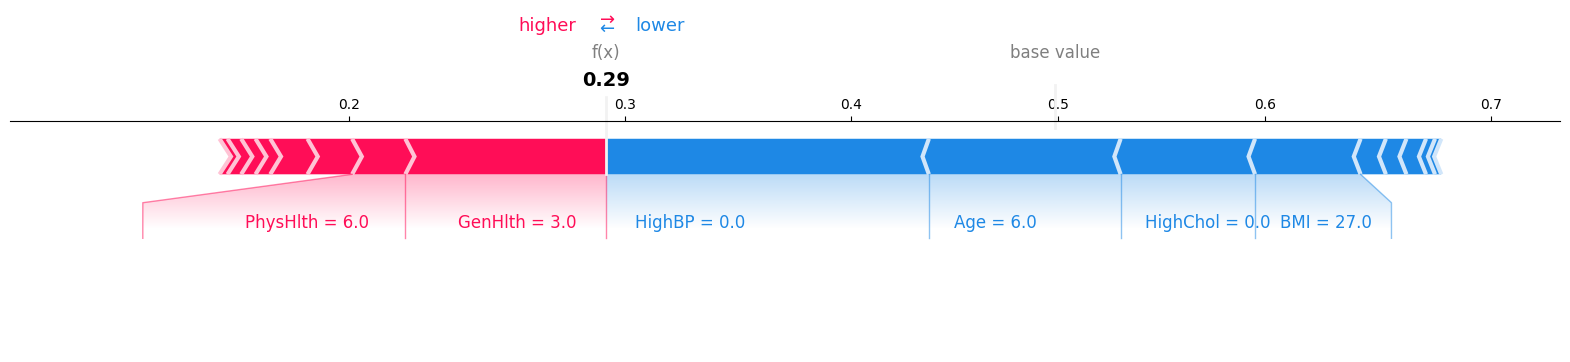

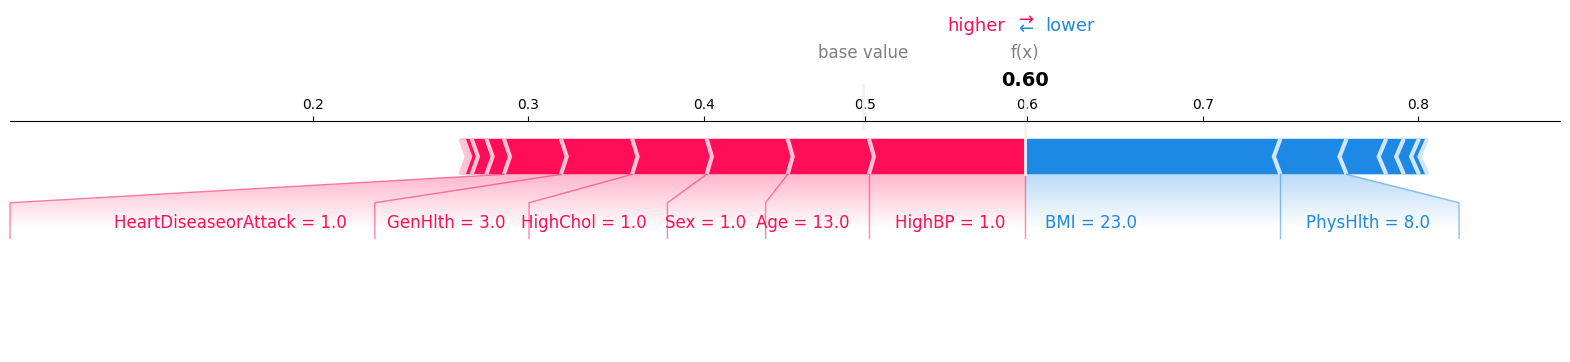

In [ ]:

indices = [1, 9, 150]
X = df.drop('Diabetes',axis=1)

shap.initjs()
for idx in indices:
    shap.force_plot(explainer.expected_value,
                    shap_values.values[idx,:],
                    X.iloc[idx,:],
                    link="logit", matplotlib=True)

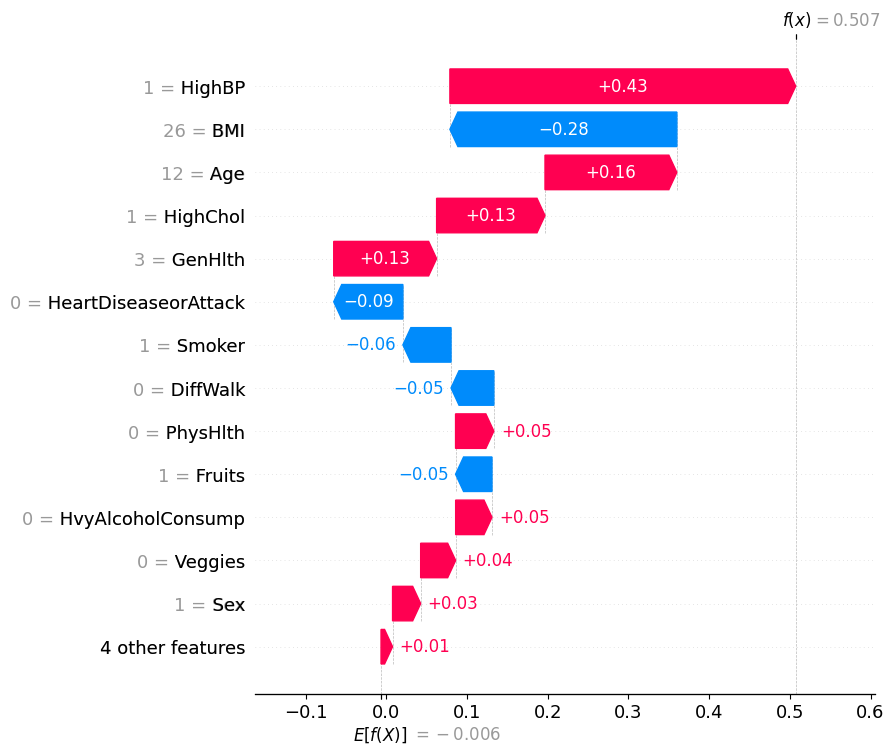

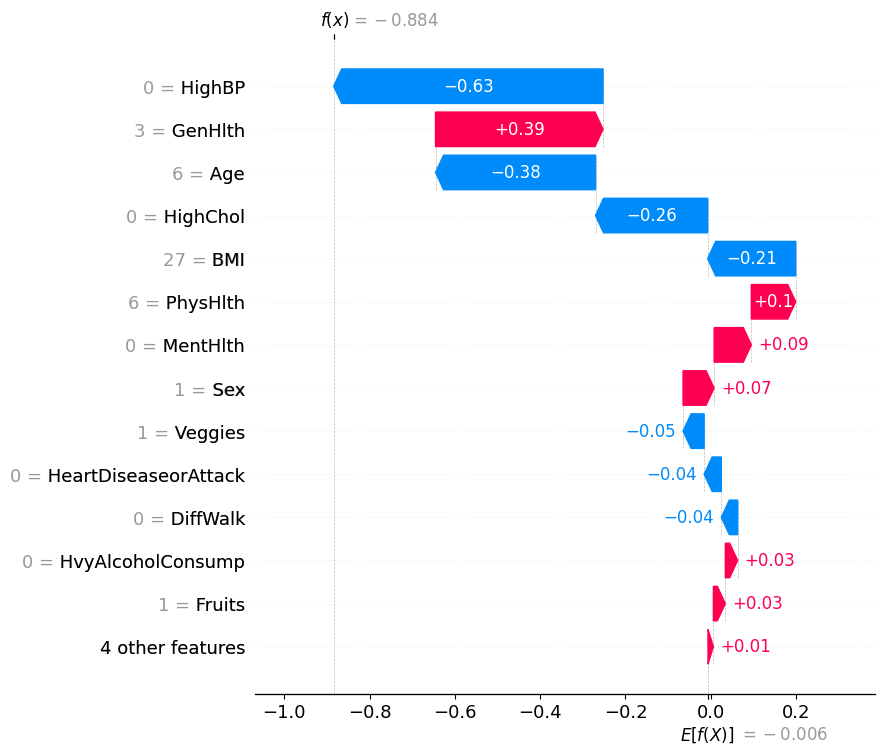

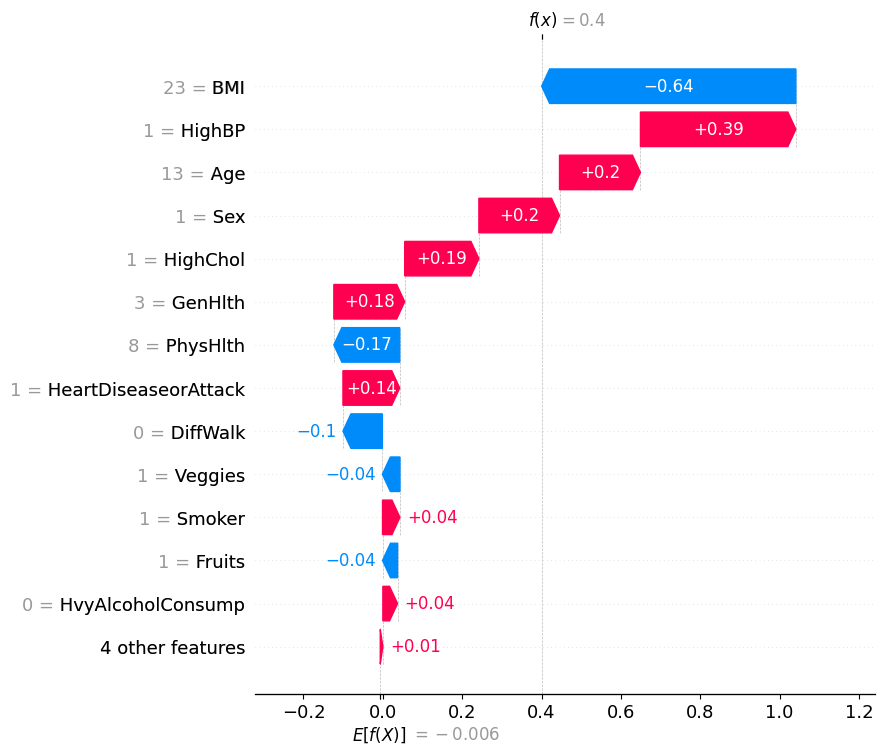

In [ ]:
for idx in indices:
    shap.plots.waterfall(shap_values[idx,:],
                        max_display=14)

Estos gráficos muestran la contribución de cada característica para la instancia específica. Las características que empujan la predicción a ser más positiva están en rojo y las que empujan la predicción a ser más negativa están en azul.

Las variables que afectan de manera positiva al tener diabetes son una alta presion alterial(HighBP) y negativamente el IMC(BMI) y la salud general(GenHlth). Aunque no en todos los casos se da por igual.

Solo con estas 3 instancias no podemos definir un patrón general para los datos, pero vemos que solo unas cuantas variables en cada caso tienen un peso grande ya sea positivo o negativo.

Finalmente, para responder a la tercera pregunta, necesitamos tener en cuenta que los valores SHAP proporcionan una visión detallada de cómo cada característica contribuye a la predicción en cada muestra. Esto significa que podemos generalizar los resultados a todo el conjunto de datos, pero debemos tener cuidado de no sobreinterpretar los resultados y recordar que estos son promedios y no se aplican a cada caso individual. Por ejemplo, aunque una característica puede ser generalmente importante, puede no ser importante en todos los casos individuales.

### Parte C (0.4 pt)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


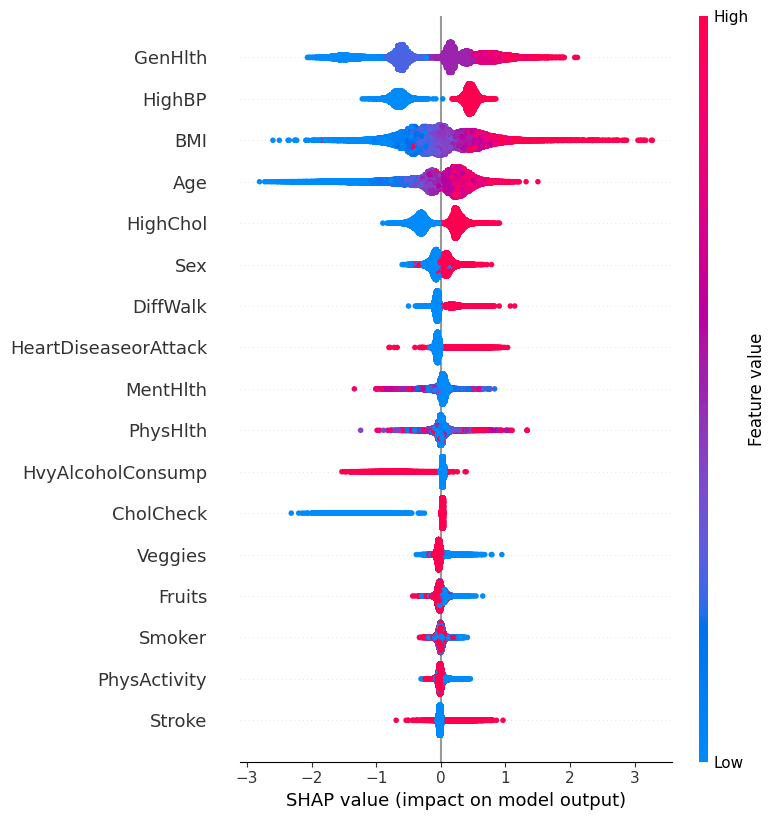

In [ ]:
# Inserte código para generar gráficos de aporte global aquí
shap.summary_plot(shap_values, X)


Comparando con las conclusiones generadas a nivel de instancia, este gráfico ofrece una visión más generalizada de la importancia de las características en todo el conjunto de datos, en lugar de centrarse en casos individuales. Esto significa que podemos ver qué características son generalmente importantes para el modelo, en lugar de qué características son importantes para casos individuales.

Por lo tanto, los resultados a nivel global pueden proporcionar una visión más generalizable y robusta de la importancia de las características.

Según este gráfico, las características más importantes son la edad, el IMC y la salud general. Esto es consistente con los resultados a nivel de instancia, donde el IMC y la salud general fueron importantes para algunas instancias individuales.

### Parte D (0.4 pt)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

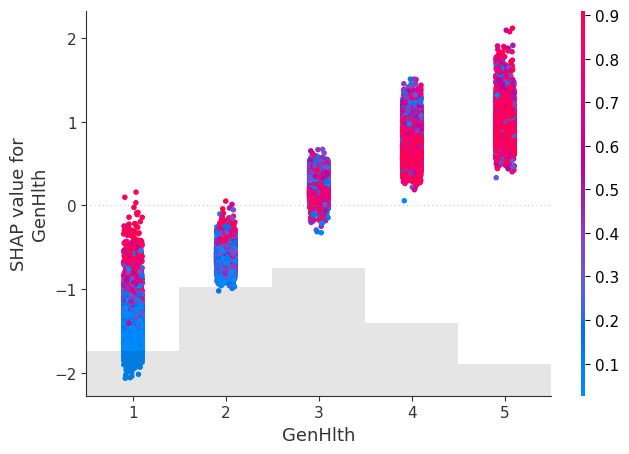

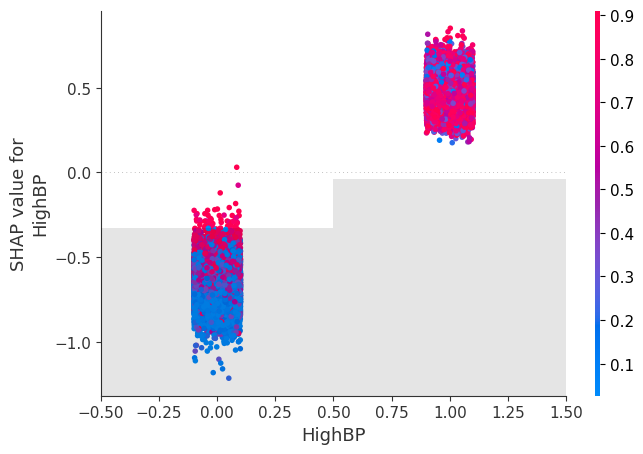

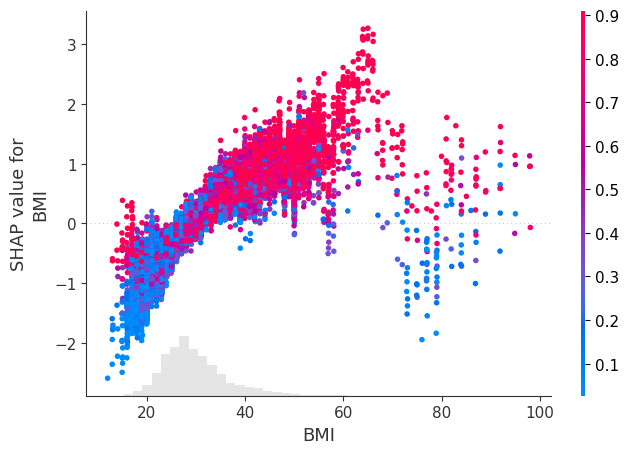

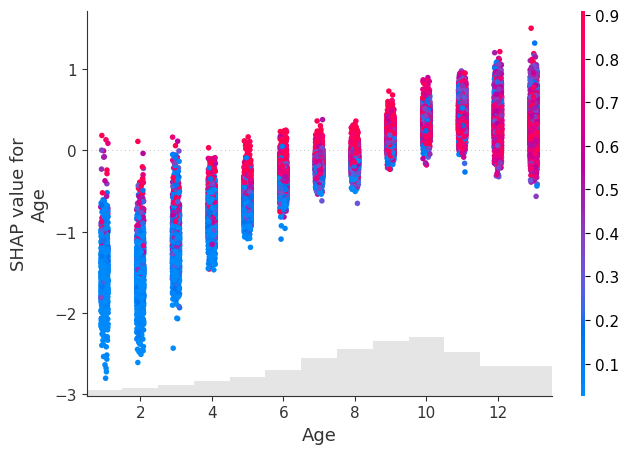

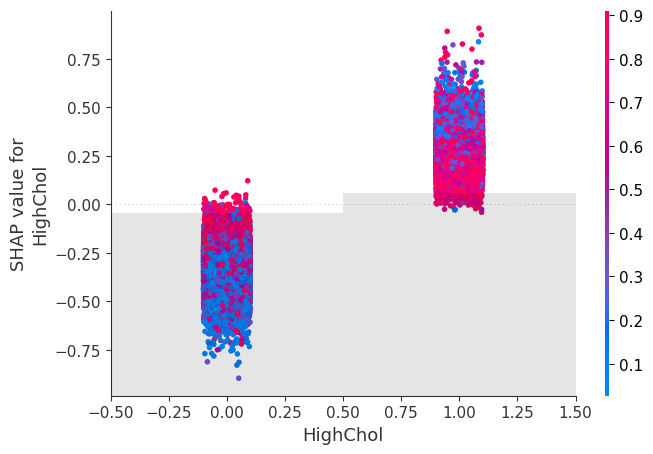

In [ ]:
# obtenemos los shap values
shap_values_abs = np.mean(np.abs(shap_values.values), axis=0)

# Obtenemos los nombres ordenados de mayor a menor
feature_importance_names = X_train.columns[shap_values_abs.argsort()[::-1]]

# Obtén las predicciones de probabilidad
probs = clf.predict_proba(X)[:, 1]

for name in feature_importance_names[:5]:
    shap.plots.scatter(shap_values[:,name],
                       color=probs)

De los gráficos se puede concluir que las características con mayor impacto global son las que tienen una mayor dispersión de valores SHAP. Esto significa que estas características tienen un mayor impacto en la predicción del modelo, ya que los valores SHAP para estas características varían más entre las diferentes observaciones. Además las distribuciones vistas van en regla con los valores generales de SHAP, donde las características más importantes son la edad, el IMC y la salud general, y la probabilidad de tener diabetes aumenta con la edad y el IMC y disminuye con la salud general.

### Parte E (0.4 pt)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?


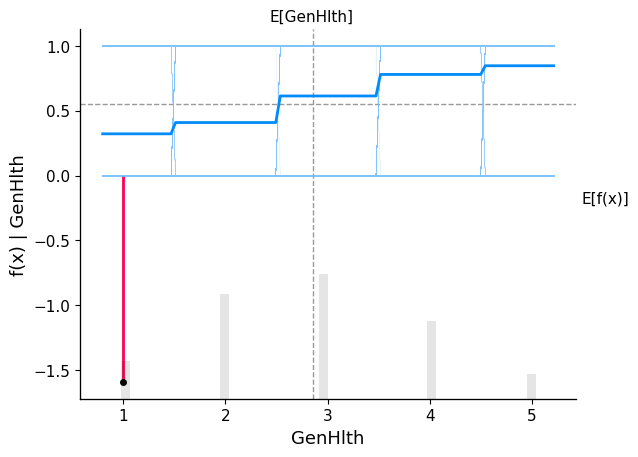

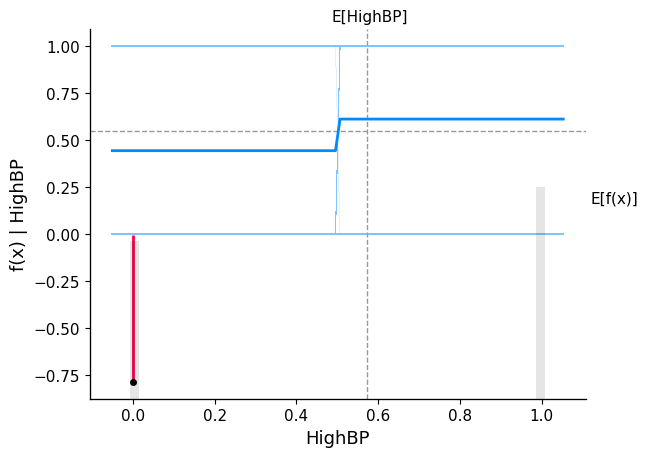

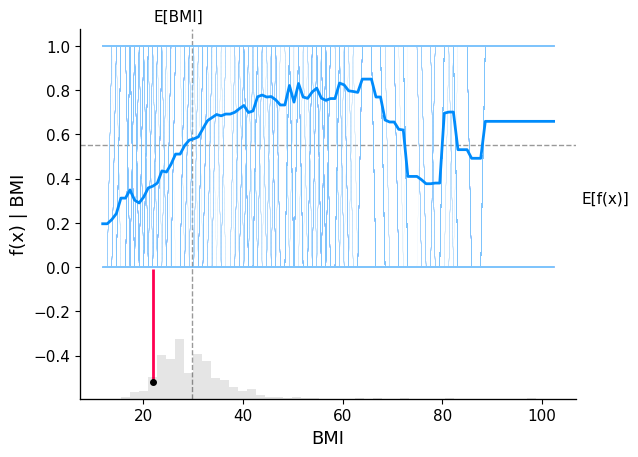

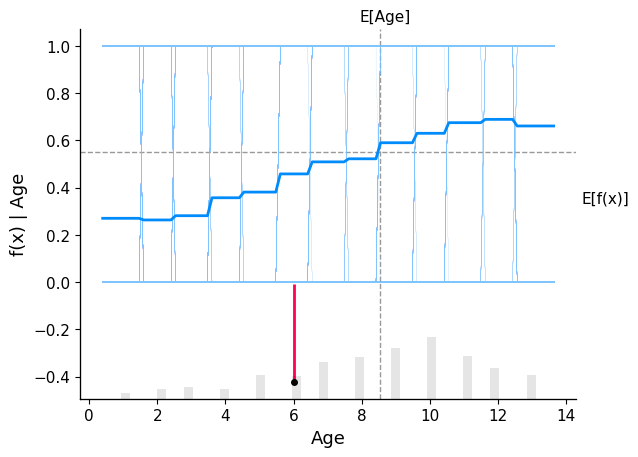

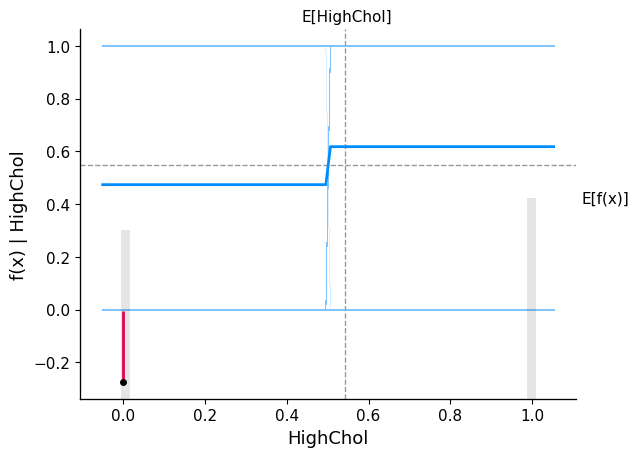

In [ ]:
X100 = shap.utils.sample(X, 1000)

sample_ind = 20
for name in feature_importance_names[:5]:
    shap.partial_dependence_plot(
        name, clf.predict, X100, model_expected_value=True,
        feature_expected_value=True, ice=True,
        shap_values=shap_values[sample_ind:sample_ind+1,:]
    )


En los graficos por lo general se ve la relación entre la característica y la salida del modelo es positiva, a medida que aumenta el valor de la característica, también lo hace la salida del modelo.

Las conclusiones basadas en los PDP son una simplificación de la realidad, ya que asumen que no existe interacción entre las características, lo cual puede no ser cierto en todos los casos. Aunque los PDP ofrecen una visión general de cómo una característica particular afecta la salida del modelo en promedio, las conclusiones específicas pueden no ser generalizables a todas las instancias en el conjunto de datos. Las características pueden interactuar entre sí de formas complejas y estas interacciones no se capturan en un PDP de una sola característica.

## 6. Sistema de Reglas! (1 pt)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [9]:
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.0/524.0 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 110.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 111.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.8 MB/s eta 0:00:00


In [10]:
from alibi.explainers import AnchorTabular

In [34]:
predict_fn = lambda x: clf.predict(x)
explainer = AnchorTabular(predict_fn, clf.feature_names_in_, seed=1)
explainer.fit(X_train.to_numpy())

AnchorTabular(meta={
  'name': 'AnchorTabular',
  'type': ['blackbox'],
  'explanations': ['local'],
  'params': {'seed': 1, 'disc_perc': (25, 50, 75)},
  'version': '0.9.3'}
)

In [35]:
explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]


0

In [36]:
class_names = ["Sin Diabetes", "Con Diabetes"]
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])

Prediction:  Sin Diabetes


In [38]:
idx = 1000
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)


idx = 3001
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

idx = 5751
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)


Prediction:  Con Diabetes
Anchor: Age > 9.00 AND HeartDiseaseorAttack > 0.00 AND HighBP > 0.00
Precision: 0.97
Coverage: 0.08
Prediction:  Con Diabetes
Anchor: BMI > 33.00 AND HighBP > 0.00 AND GenHlth > 2.00
Precision: 0.97
Coverage: 0.15
Prediction:  Sin Diabetes
Anchor: GenHlth <= 2.00 AND HighBP <= 0.00 AND BMI <= 25.00
Precision: 0.99
Coverage: 0.11


 estas reglas dan una buena precisión, lo que indica que las condiciones de las reglas predicen de manera precisa el resultado de tener o no tener diabetes en un individuo.

Para la primera regla: "Si la Edad > 9.00 Y tiene antecedentes de Enfermedad del Corazón o Ataque al Corazón > 0.00 Y tiene Alta Presión Arterial > 0.00, entonces la persona tiene diabetes". La precisión de esta regla es del 97%, lo que indica que esta regla es precisa en su predicción del 97% de las veces. La cobertura de esta regla es del 8%, lo que significa que esta regla se aplica al 8% de las observaciones en el conjunto de datos.

Para la segunda regla: "Si el Índice de Masa Corporal (BMI) > 33.00 Y tiene Alta Presión Arterial > 0.00 Y su Salud General > 2.00, entonces la persona tiene diabetes". La precisión de esta regla es del 97%, lo que indica que esta regla es precisa en su predicción del 97% de las veces. La cobertura de esta regla es del 15%, lo que significa que esta regla se aplica al 15% de las observaciones en el conjunto de datos.

Para la tercera regla: "Si su Salud General <= 2.00 Y tiene Alta Presión Arterial <= 0.00 Y el Índice de Masa Corporal (BMI) <= 25.00, entonces la persona no tiene diabetes". La precisión de esta regla es del 99%, lo que indica que esta regla es precisa en su predicción del 99% de las veces. La cobertura de esta regla es del 11%, lo que significa que esta regla se aplica al 11% de las observaciones en el conjunto de datos.

Aunque la cobertura de las reglas no es muy alta (8%, 15% y 11% respectivamente), cubren un espectro decente de situaciones posibles, lo que las hace valiosas para interpretar las predicciones del modelo en un conjunto diverso de instancias. Aunque esas reglas no cubren todo el conjunto de datos, la alta precisión que aportan en los segmentos de población que sí cubren hace que sean reglas útiles y confiables en la interpretación del modelo.

# Retrospectiva... (1 pt)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

Depende de lo queramos ver cada método tiene sus fortalezas y debilidades.

Importancia de las características (Feature Importance): Este es un método global que proporciona una visión general de qué características son más importantes para el modelo en su totalidad. Es útil para tener una visión general de lo que el modelo está considerando al tomar sus decisiones, pero no proporciona ninguna información sobre cómo esas características afectan individualmente a cada predicción.

SHAP (SHapley Additive exPlanations): Este es un método tanto local como global. A nivel local, proporciona una explicación detallada de cómo cada característica contribuye a la predicción para una instancia individual, lo cual es útil para entender el razonamiento del modelo en casos específicos. A nivel global, proporciona una visión general de cómo las características afectan las predicciones del modelo en general. Los gráficos de dependencia de SHAP y los gráficos de importancia de las características proporcionan una visión muy completa y detallada de las decisiones del modelo.

Reglas de anclaje (Anchor Rules): Este es un método local que proporciona reglas claras y fácilmente interpretables que explican por qué el modelo hizo una predicción específica. Esto es especialmente útil para proporcionar explicaciones simples y comprensibles a personas que no son expertas en el modelo, como los pacientes en este caso.

Para la tarea de clasificación de diabetes, SHAP y las reglas de anclaje proporcionan las conclusiones más detalladas y útiles. SHAP proporciona una visión detallada de cómo las características afectan las predicciones tanto a nivel individual como general, mientras que las reglas de anclaje proporcionan explicaciones simples y comprensibles para las predicciones individuales.

En cuanto a la pregunta del problema del Dr. Simi, la elección entre los métodos depende del propósito de la explicación. Si el Dr. Simi necesita entender las decisiones del modelo a nivel general para mejorar el modelo o para verificar su alineación con la comprensión médica de la diabetes, los métodos globales como la importancia de las características y SHAP a nivel global serían más útiles. Por otro lado, si el Dr. Simi necesita explicar a un paciente individual por qué el modelo hizo una predicción específica, entonces los métodos locales como SHAP a nivel local y las reglas de anchor serían más útiles, pues para cada grupo se optimiza la desición y la predicción de si tiene diabetes o no. El hecho de poder entender el razonamiento detrás de una predicción puede ayudar a los pacientes a confiar más en el diagnóstico o pronóstico. Esto puede ser especialmente importante en el contexto médico, donde la confianza del paciente puede afectar su enfrentamiento a la enfermedad.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>